# 混淆矩阵 confusion matrix

In [5]:
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
# 挑选训练集和测试集
import sklearn.model_selection as ms
import sklearn.metrics as sm
# 将混淆矩阵可视化
import mpl_toolkits.axes_grid1 as mg

## 增加一个性能报告

[[23  0  0  0]
 [ 0 20  1  0]
 [ 0  0 34  0]
 [ 1  0  0 21]]
Accuracy:98.0%
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        23
         1.0       1.00      0.95      0.98        21
         2.0       0.97      1.00      0.99        34
         3.0       1.00      0.95      0.98        22

   micro avg       0.98      0.98      0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



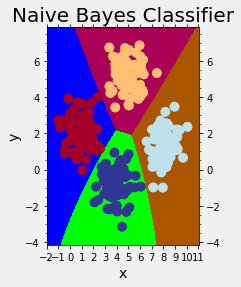

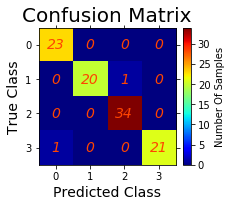

In [9]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y)

def train_model(x,y):
    model = nb.GaussianNB()
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    
# 求取混淆矩阵
def eval_cm(y,pred_y):
    cm = sm.confusion_matrix(y,pred_y)
    print(cm)
    return cm

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
def init_class():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.subplot(121)
    mp.title('Naive Bayes Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(axis='y',linestyle=':')
    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='brg')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_train(train_x,train_y):
    mp.scatter(train_x[:,0],train_x[:,1],c=train_y,
               cmap='RdYlBu',s=80)
    mp.show()
    
def draw_test(test_x,test_y,pred_test_y):
    # marker='D'是菱形
    mp.scatter(test_x[:,0],test_x[:,1],marker='D',
              c=test_y,cmap='RdYlBu',s=80)
    mp.scatter(test_x[:,0],test_x[:,1],marker='x',
              c=pred_test_y,cmap='RdYlBu',s=80)
    
def init_cm():
    mp.subplot(122)
    mp.title('Confusion Matrix',fontsize=20)
    mp.xlabel('Predicted Class',fontsize=14)
    mp.ylabel('True Class',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)

def draw_cm(cm):
    # interpolation以最近的方式做颜色匹配
    im = mp.imshow(cm,interpolation='nearest',cmap='jet')
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            mp.text(col,row,str(cm[row,col]),
                   color='orangered',fontsize=14,
                   fontstyle='italic',ha='center',
                   va='center')
    # 用颜色表来对应颜色，首先创建一个轴对象
    dv = mg.make_axes_locatable(mp.gca())
    # 追加一个坐标轴图像,宽度6%，填充5%
    ca = dv.append_axes('right','6%',pad = '5%')
    # 创建颜色条
    cb = mp.colorbar(im,cax=ca)
    cb.set_label('Number Of Samples')
    
def main():
    x,y = read_data('multiple1.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    cm = eval_cm(test_y,pred_test_y)
    eval_ac(test_y,pred_test_y)
    eval_cr(test_y,pred_test_y)
    init_class()
    draw_grid(grid_x,grid_y)
    draw_train(train_x,train_y)
    draw_test(test_x,test_y,pred_test_y)
    init_cm()
    draw_cm(cm)
    return 0

if __name__ == '__main__':
    main()
    